### Activity 1: Data Loading and Exploration

Initializing the analysis by loading and exploring the dataset, ensuring data integrity and format consistency
for accurate downstream analysis.

1. Load the COVID-19 dataset using pandas from the provided dataset.
2. Display the first 5 and last 5 rows of the DataFrame.
3. Check for missing values in the dataset and decide on a strategy to handle them.
4. Remove the columns with more than 90% of missing values.
5. Convert the 'date' column to the datetime data type.

In [98]:
import pandas as pd


In [99]:
#load dataset into a dataframe
covid = pd.read_csv('covid.csv', index_col=0)

In [100]:
covid.shape

(358838, 66)

In [101]:
#display first 5 rows of datframe
covid.head(5)

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
iso_code,,,,,,,,,,,,,,,,,,,,,
AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [102]:
#display last 5 rows of datframe
covid.tail(5)

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
iso_code,,,,,,,,,,,,,,,,,,,,,
ZWE,Africa,Zimbabwe,2023-11-18,265890.0,0.0,0.0,5725.0,0.0,0.0,16291.741,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
ZWE,Africa,Zimbabwe,2023-11-19,265890.0,0.0,0.0,5725.0,0.0,0.0,16291.741,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
ZWE,Africa,Zimbabwe,2023-11-20,265890.0,0.0,0.0,5725.0,0.0,0.0,16291.741,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
ZWE,Africa,Zimbabwe,2023-11-21,265890.0,0.0,0.0,5725.0,0.0,0.0,16291.741,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
ZWE,Africa,Zimbabwe,2023-11-22,265890.0,0.0,0.0,5725.0,0.0,0.0,16291.741,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [103]:
covid.isnull().sum()

continent                                   17108
location                                        0
date                                            0
total_cases                                 38210
new_cases                                    9806
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       346627
excess_mortality_cumulative                346627
excess_mortality                           346627
excess_mortality_cumulative_per_million    346627
Length: 66, dtype: int64

In [104]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358838 entries, AFG to ZWE
Data columns (total 66 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   continent                                   341730 non-null  object 
 1   location                                    358838 non-null  object 
 2   date                                        358838 non-null  object 
 3   total_cases                                 320628 non-null  float64
 4   new_cases                                   349032 non-null  float64
 5   new_cases_smoothed                          347773 non-null  float64
 6   total_deaths                                299086 non-null  float64
 7   new_deaths                                  349089 non-null  float64
 8   new_deaths_smoothed                         347859 non-null  float64
 9   total_cases_per_million                     320628 non-null  float64
 10  ne

In [105]:
#Remove the columns with more than 90% of missing values.
missingThreshold = 0.9

covidFilter=covid.dropna(thresh=(1-missingThreshold)*len(covid),axis=1)

In [106]:
df = covidFilter[['continent', 'location', 'date', 'total_cases','new_cases', 'total_deaths', 'new_deaths','total_tests', 'new_tests', 'total_vaccinations', 'people_vaccinated', 'female_smokers', 'male_smokers', 'hospital_beds_per_thousand','new_deaths_per_million','new_cases_per_million','positive_rate']]

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358838 entries, AFG to ZWE
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   continent                   341730 non-null  object 
 1   location                    358838 non-null  object 
 2   date                        358838 non-null  object 
 3   total_cases                 320628 non-null  float64
 4   new_cases                   349032 non-null  float64
 5   total_deaths                299086 non-null  float64
 6   new_deaths                  349089 non-null  float64
 7   total_tests                 79387 non-null   float64
 8   new_tests                   75403 non-null   float64
 9   total_vaccinations          80162 non-null   float64
 10  people_vaccinated           76724 non-null   float64
 11  female_smokers              208840 non-null  float64
 12  male_smokers                206000 non-null  float64
 13  hospital_beds_per_th

In [108]:
#Convert the 'date' column to the datetime data type.
df['date']=pd.to_datetime(df['date'])

/var/folders/45/q5xntqvn17z3dzsttkthkkyh0000gn/T/ipykernel_8884/2335182614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=pd.to_datetime(df['date'])


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358838 entries, AFG to ZWE
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   continent                   341730 non-null  object        
 1   location                    358838 non-null  object        
 2   date                        358838 non-null  datetime64[ns]
 3   total_cases                 320628 non-null  float64       
 4   new_cases                   349032 non-null  float64       
 5   total_deaths                299086 non-null  float64       
 6   new_deaths                  349089 non-null  float64       
 7   total_tests                 79387 non-null   float64       
 8   new_tests                   75403 non-null   float64       
 9   total_vaccinations          80162 non-null   float64       
 10  people_vaccinated           76724 non-null   float64       
 11  female_smokers              208840 non-null  

### Activity 2: Data Cleaning and Feature Engineering Enhancing data relevance and structure, enabling focused analysis on key COVID-19 indicators and demographic factors.

1. Impute missing values in the dataset columns

2. Remove duplicate rows from the DataFrame.

3. Create new features if needed (e.g., extract year and month from the 'date' column).

4. Explore unique countries in the dataset and count the total number of countries.



In [110]:
df.shape

(358838, 17)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358838 entries, AFG to ZWE
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   continent                   341730 non-null  object        
 1   location                    358838 non-null  object        
 2   date                        358838 non-null  datetime64[ns]
 3   total_cases                 320628 non-null  float64       
 4   new_cases                   349032 non-null  float64       
 5   total_deaths                299086 non-null  float64       
 6   new_deaths                  349089 non-null  float64       
 7   total_tests                 79387 non-null   float64       
 8   new_tests                   75403 non-null   float64       
 9   total_vaccinations          80162 non-null   float64       
 10  people_vaccinated           76724 non-null   float64       
 11  female_smokers              208840 non-null  

In [112]:
df.isnull().sum()

continent                      17108
location                           0
date                               0
total_cases                    38210
new_cases                       9806
total_deaths                   59752
new_deaths                      9749
total_tests                   279451
new_tests                     283435
total_vaccinations            278676
people_vaccinated             282114
female_smokers                149998
male_smokers                  152838
hospital_beds_per_thousand    113078
new_deaths_per_million          9749
new_cases_per_million           9806
positive_rate                 262911
dtype: int64

In [113]:
numerical = df[['total_cases','new_cases', 'total_deaths', 'new_deaths','total_tests', 'new_tests', 'total_vaccinations', 'people_vaccinated', 'female_smokers', 'male_smokers', 'hospital_beds_per_thousand','new_deaths_per_million','new_cases_per_million','positive_rate']]

In [114]:
for col in numerical:
    df[col].fillna(df[col].median(), inplace=True)

/var/folders/45/q5xntqvn17z3dzsttkthkkyh0000gn/T/ipykernel_8884/2714759758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].median(), inplace=True)


In [115]:
df['continent'].fillna('Unknown', inplace=True)

/var/folders/45/q5xntqvn17z3dzsttkthkkyh0000gn/T/ipykernel_8884/2814043309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['continent'].fillna('Unknown', inplace=True)


In [116]:
df.isnull().sum()

continent                     0
location                      0
date                          0
total_cases                   0
new_cases                     0
total_deaths                  0
new_deaths                    0
total_tests                   0
new_tests                     0
total_vaccinations            0
people_vaccinated             0
female_smokers                0
male_smokers                  0
hospital_beds_per_thousand    0
new_deaths_per_million        0
new_cases_per_million         0
positive_rate                 0
dtype: int64

In [117]:
#remove duplicate rows in dataframe

df.drop_duplicates(inplace=True)

/var/folders/45/q5xntqvn17z3dzsttkthkkyh0000gn/T/ipykernel_8884/4085955388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [118]:
#Extract month and year from date column

df['month']=df['date'].dt.month
df['year']=df['date'].dt.year

/var/folders/45/q5xntqvn17z3dzsttkthkkyh0000gn/T/ipykernel_8884/544080516.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['date'].dt.month
/var/folders/45/q5xntqvn17z3dzsttkthkkyh0000gn/T/ipykernel_8884/544080516.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=df['date'].dt.year


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 358838 entries, AFG to ZWE
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   continent                   358838 non-null  object        
 1   location                    358838 non-null  object        
 2   date                        358838 non-null  datetime64[ns]
 3   total_cases                 358838 non-null  float64       
 4   new_cases                   358838 non-null  float64       
 5   total_deaths                358838 non-null  float64       
 6   new_deaths                  358838 non-null  float64       
 7   total_tests                 358838 non-null  float64       
 8   new_tests                   358838 non-null  float64       
 9   total_vaccinations          358838 non-null  float64       
 10  people_vaccinated           358838 non-null  float64       
 11  female_smokers              358838 non-null  

In [120]:
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

In [121]:
unique_countries= df['location'].unique()

In [122]:
unique_countries.shape

(255,)

In [123]:
len(unique_countries)

255

In [124]:
df['location'].value_counts()
#total number of countries is 255. 

location
High income            1428
Upper middle income    1428
North America          1428
India                  1428
World                  1428
                       ... 
Scotland               1305
Wales                  1198
Macao                   795
Northern Cyprus         691
Western Sahara            1
Name: count, Length: 255, dtype: int64

### Activity 3: Worldwide COVID-19 Overview Providing a global and temporal perspective on COVID-19, identifying patterns and correlations crucial for strategic decision-making.

1. Visualize the total COVID-19 cases and total deaths by continent using bar plots.

2. Explore the monthly trend of new COVID-19 cases using a line plot.

3. Investigate the correlation between total cases and total deaths using a heatmap.

4. Analyze how total cases have evolved over time for a specific location (e.g., India). 

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### 1.Visualize the total COVID-19 cases and total deaths by continent using bar plots.

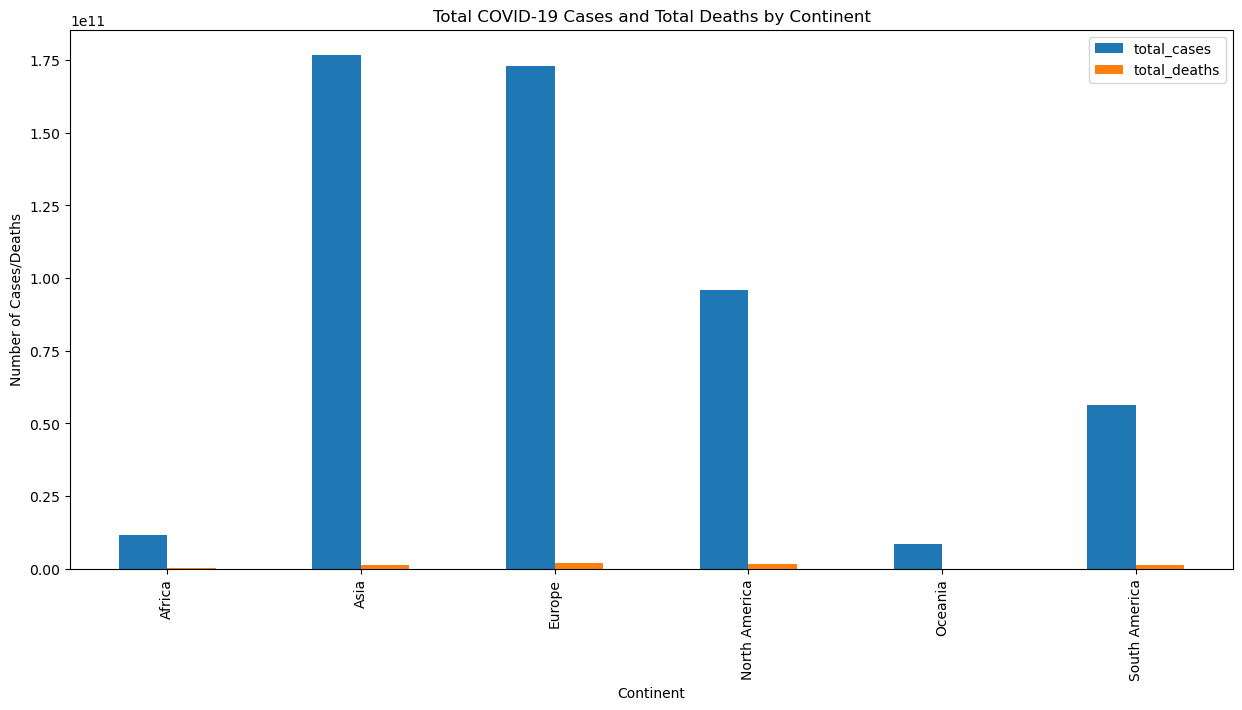

In [126]:
selected = df.drop(columns=['date'])

#filter out rows with unknown continent

filtered_df = selected[selected['continent'] != 'Unknown']

#group by continent and sum the total cases and total deaths

grouped_df = filtered_df.groupby('continent').sum()[['total_cases','total_deaths']]

#plot the bar chart 

grouped_df.plot(kind='bar', figsize=(15,7))
plt.title('Total COVID-19 Cases and Total Deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Cases/Deaths')
plt.show()

#### 2. Explore the monthly trend of new COVID-19 cases using a line plot.

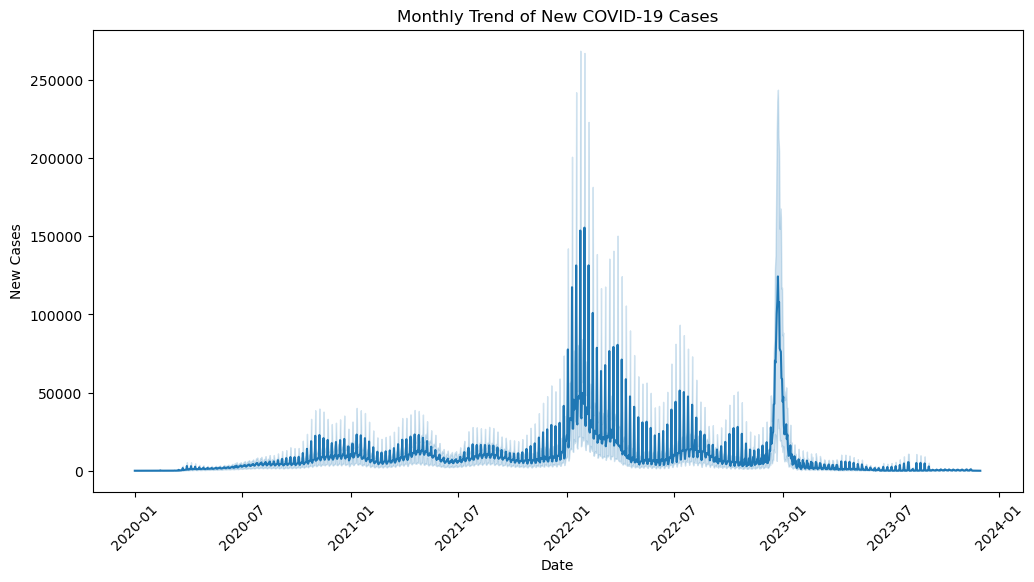

In [127]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_cases', data=df)
plt.title('Monthly Trend of New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.show()


#### 3. Investigate the correlation between total cases and total deaths using a heatmap.

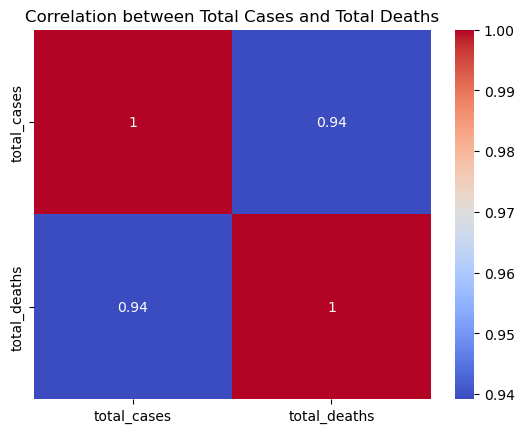

In [128]:
#find correlation between total cases and total deaths using a heatmap.

sns.heatmap(df[['total_cases', 'total_deaths']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Total Cases and Total Deaths')
plt.show()

#### 4. Analyze how total cases have evolved over time for a specific location (e.g., India).


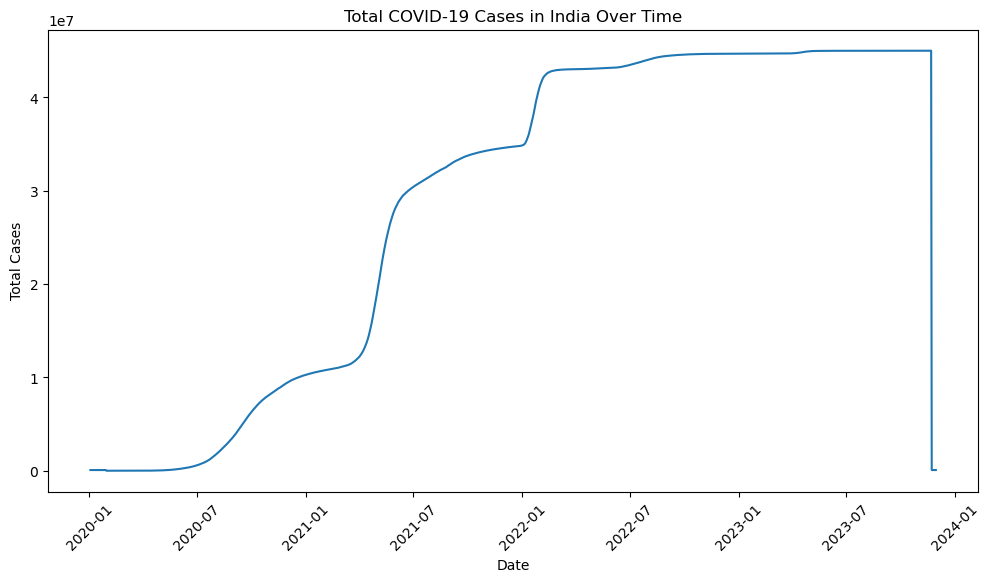

In [129]:
# analyse how total cases have evolved over time in India

#filter out data for India
location_data = df[df['location'] == 'India']

#plot total cases over time for India
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_cases', data=location_data)
plt.title('Total COVID-19 Cases in India Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()

### Activity 4: Regional Analysis Unveiling regional nuances in COVID-19 dynamics and identifying patterns in case distribution and fatality across time and continents.
1. Create a grouped bar chart to visualize new cases by continent and month.

2. Visualize the distribution of total COVID-19 cases by year using a box plot.

3. Compare total deaths across different continents using a bar plot.

4. Analyze the total cases on a month-by-month basis using a bar plot.



#### 1. Create a grouped bar chart to visualize new cases by continent and month.

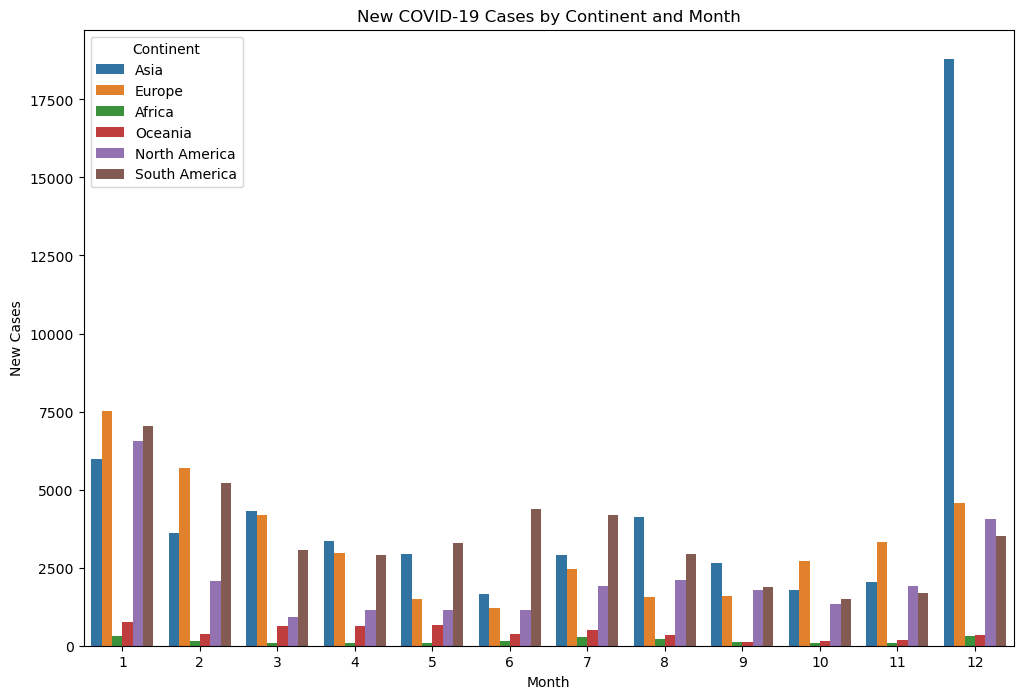

In [143]:
#group bar chart by continent and month
plt.figure(figsize=(12, 8))
sns.barplot(x='month', y='new_cases', hue='continent', data=filtered_df, errorbar=None)
plt.title('New COVID-19 Cases by Continent and Month')
plt.xlabel('Month')
plt.ylabel('New Cases')
plt.legend(title='Continent')
plt.show()

#### 2. Visualize the distribution of total COVID-19 cases by year using a box plot.

Text(0, 0.5, 'Total Cases')

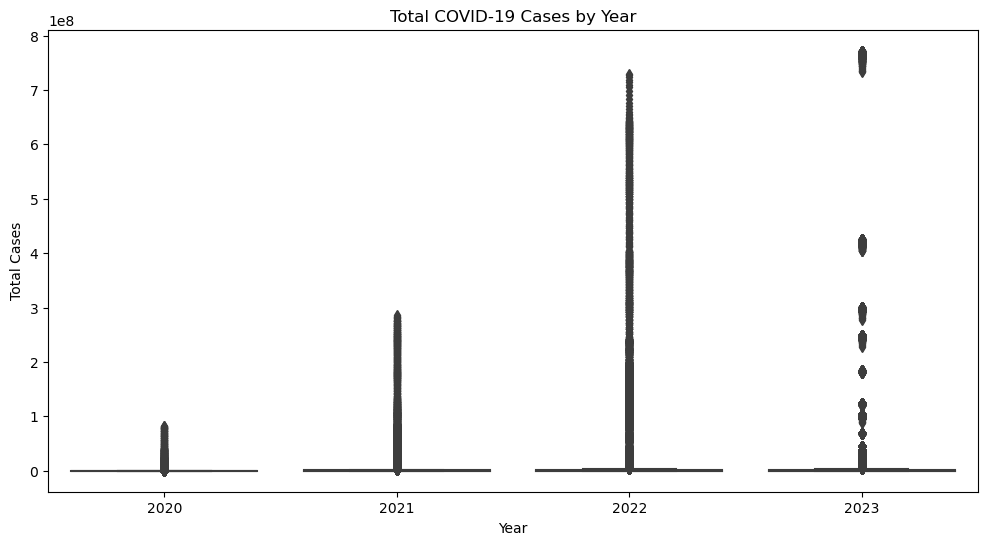

In [131]:
#plot box plot for total covid cases by year
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='total_cases', data=df)
plt.title('Total COVID-19 Cases by Year')
plt.xlabel('Year')
plt.ylabel('Total Cases')

#### 3. Compare total deaths across different continents using a bar plot.

Text(0, 0.5, 'Total Deaths')

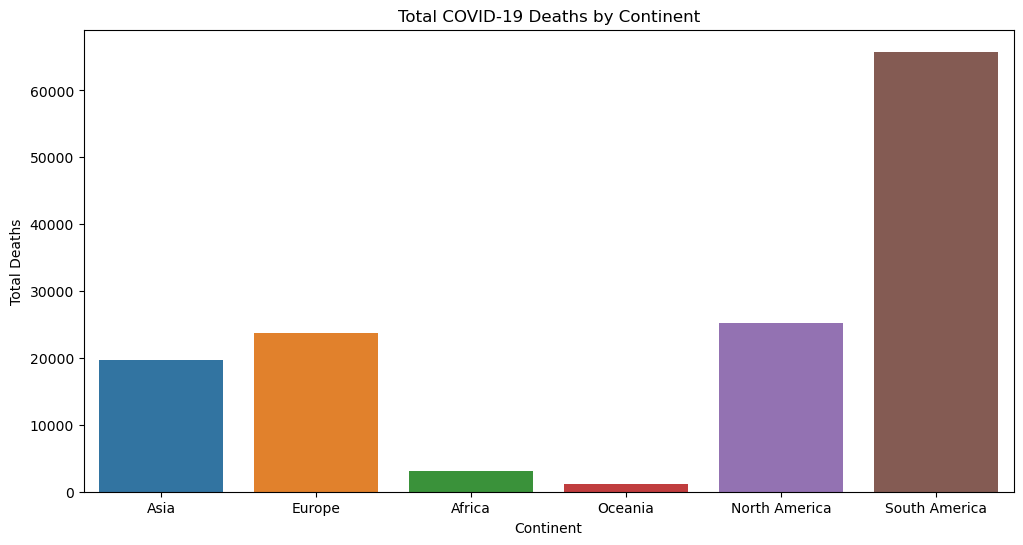

In [144]:
#plot bar graph of total deaths grouped by continents
plt.figure(figsize=(12, 6))
sns.barplot(x='continent', y='total_deaths', data=filtered_df, errorbar=None)
plt.title('Total COVID-19 Deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Deaths')

#### 4. Analyze the total cases on a month-by-month basis using a bar plot.

In [139]:
totalcasebymonth = df.groupby('month')['total_cases'].sum().reset_index()

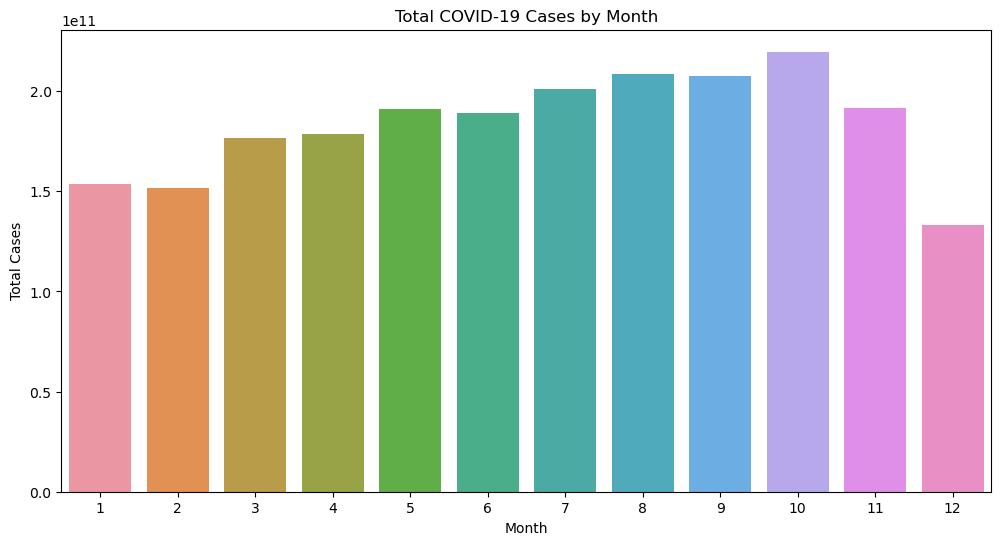

In [141]:
#plot bar plot by month of total cases
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='total_cases', data=totalcasebymonth, errorbar=None)
plt.title('Total COVID-19 Cases by Month')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.show()

### Activity 5: Time Series Analysis Capturing the daily dynamics of COVID-19, assessing the impact of vaccination, and monitoring testing metrics for a comprehensive global overview.
1. Explore the daily trend of new cases and new deaths globally using line plots.

2. Calculate and visualize the daily average new cases and deaths globally.

3. Explore the trend of vaccination coverage over time globally.

4. Analyze the total tests and positive rate over time globally. 

#### 1. Explore the daily trend of new cases and new deaths globally using line plots.

In [146]:
filter_df = df[df['continent'] != 'Unknown']

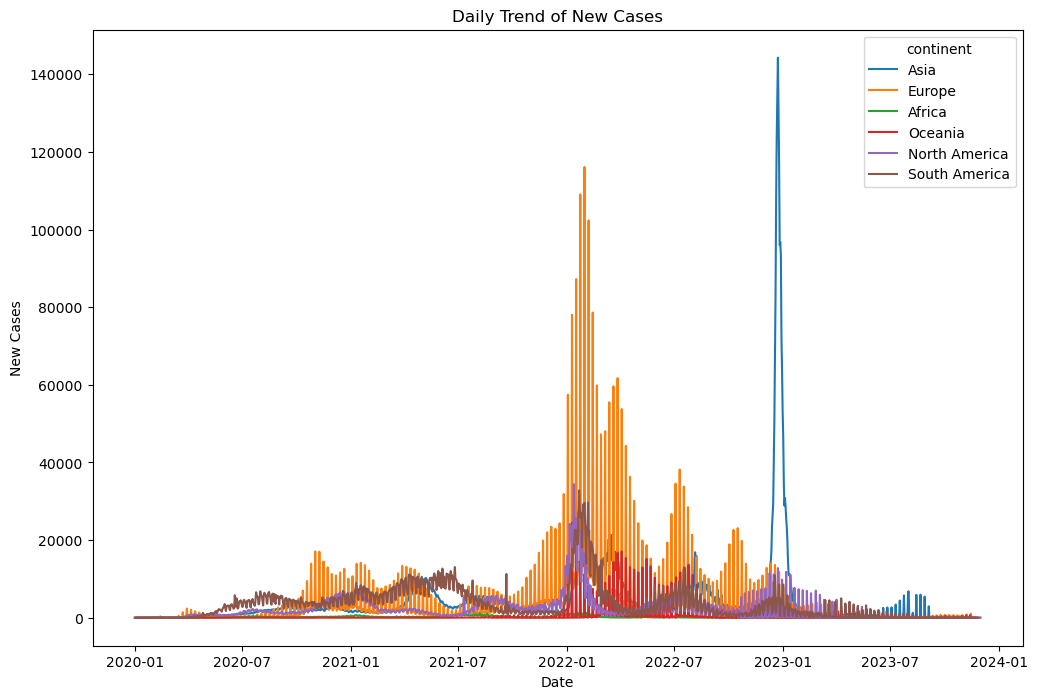

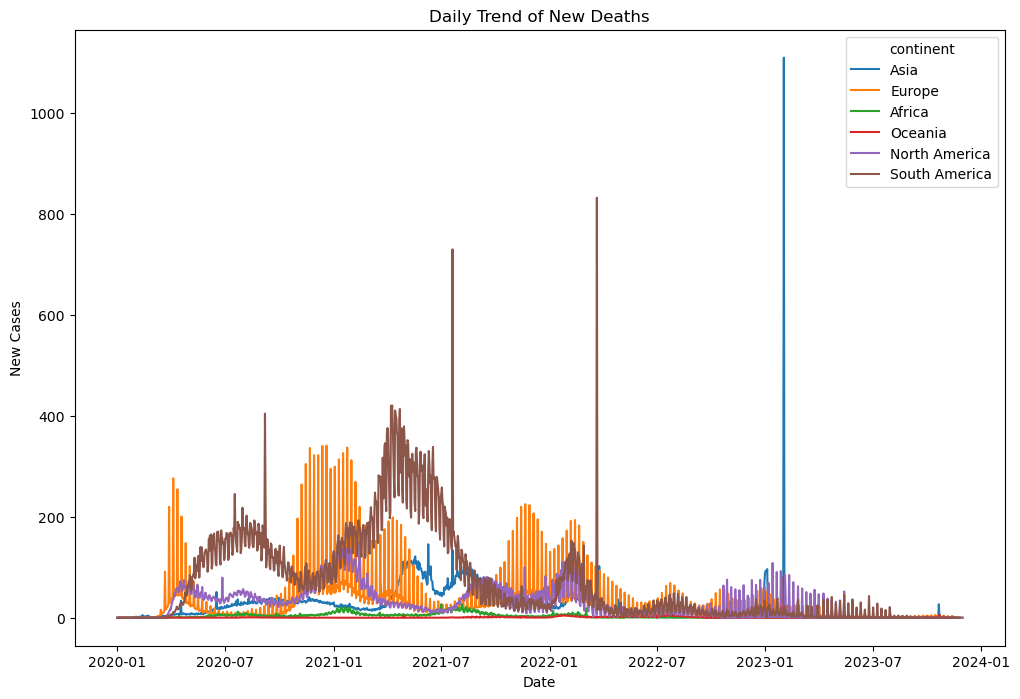

In [149]:

#plot line graph of daily new cases 

plt.figure(figsize=(12,8))
sns.lineplot(x='date', y='new_cases', data=filter_df, hue='continent', errorbar=None)
plt.title('Daily Trend of New Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()


#plot line graph of daily new deaths 

plt.figure(figsize=(12,8))
sns.lineplot(x='date', y='new_deaths', data=filter_df, hue='continent', errorbar=None)
plt.title('Daily Trend of New Deaths')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

#### 2. Calculate and visualize the daily average new cases and deaths globally.

In [150]:
#get average 
dailyaverage = filter_df.groupby('date').agg({'new_cases':'mean', 'new_deaths':'mean'}).reset_index()

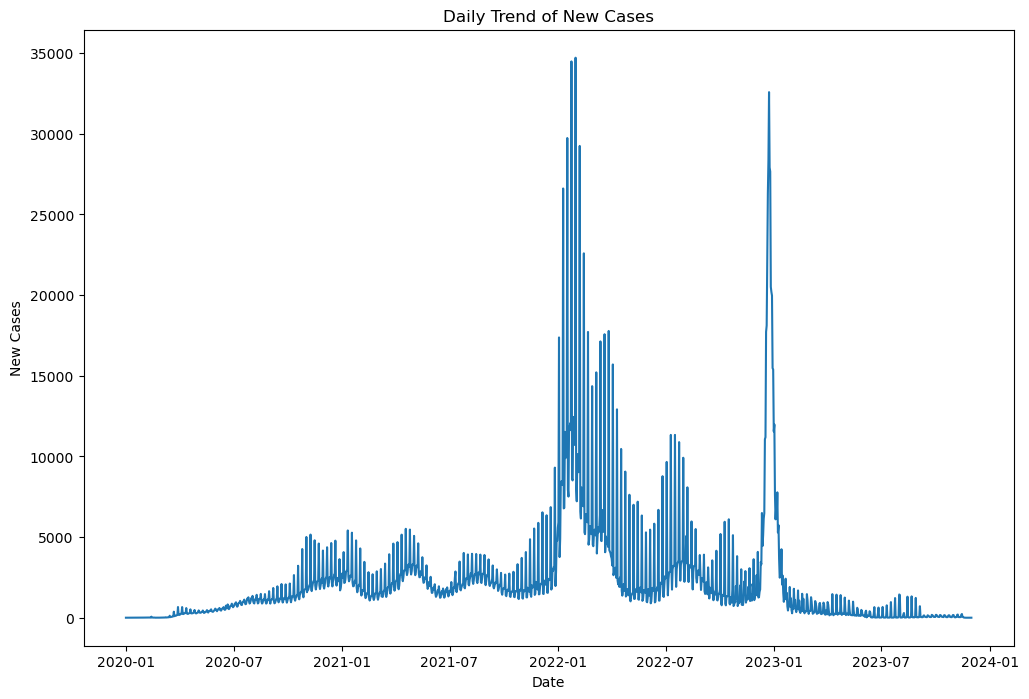

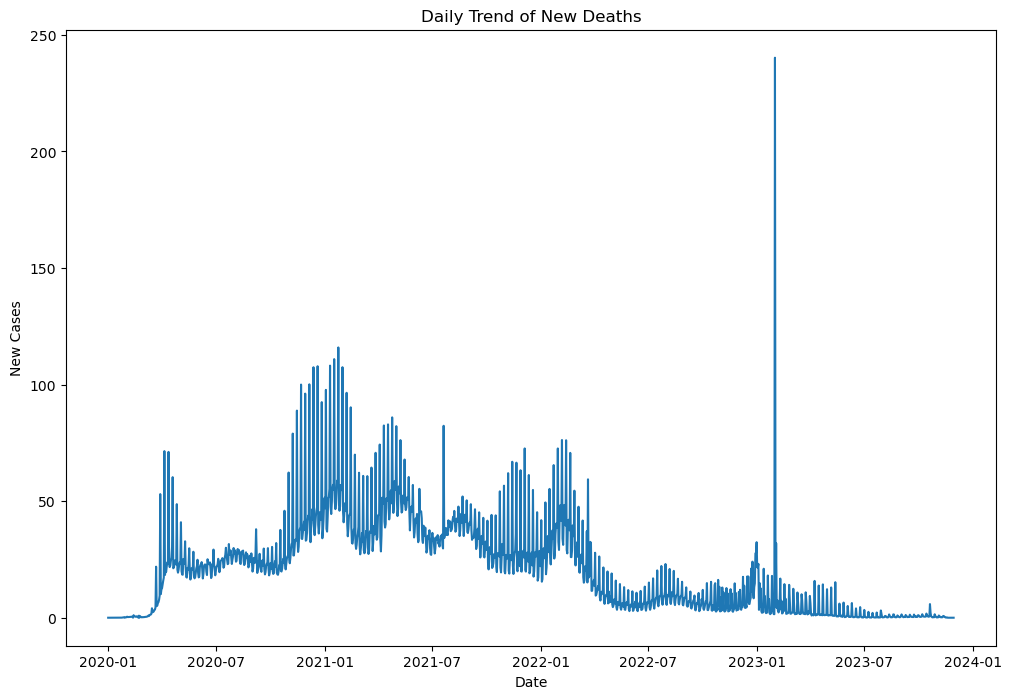

In [152]:
#create line plot of average daily new cases

plt.figure(figsize=(12,8))
sns.lineplot(x='date', y='new_cases', data=dailyaverage, errorbar=None)
plt.title('Daily Trend of New Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()


#plot line graph of daily average new deaths 

plt.figure(figsize=(12,8))
sns.lineplot(x='date', y='new_deaths', data=dailyaverage, errorbar=None)
plt.title('Daily Trend of New Deaths')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()


#### 3. Explore the trend of vaccination coverage over time globally.

Text(0, 0.5, 'People Vaccinated')

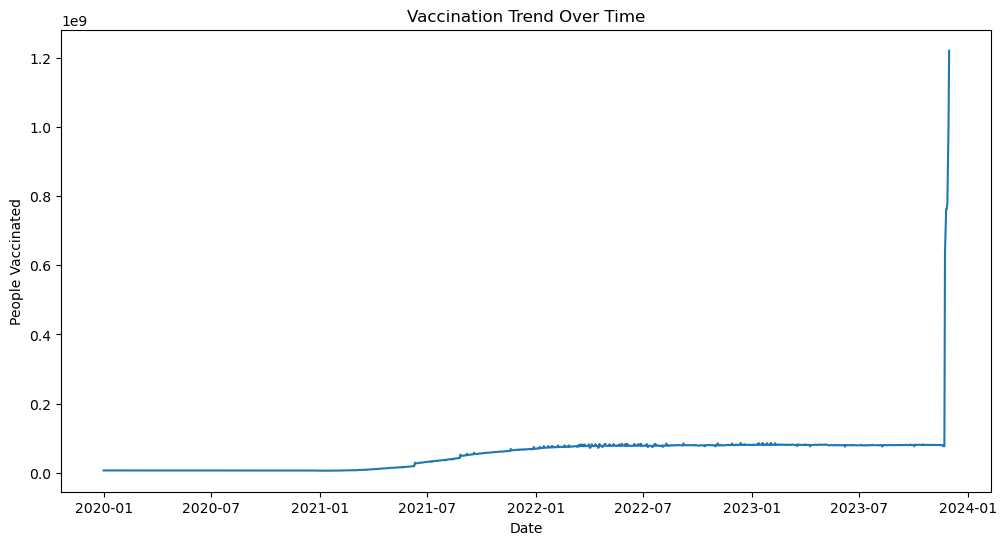

In [142]:
#plot line graph of vaccination trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='people_vaccinated', data=df, errorbar=None)
plt.title('Vaccination Trend Over Time')
plt.xlabel('Date')
plt.ylabel('People Vaccinated')

#### 4. Analyze the total tests and positive rate over time globally.

Text(0, 0.5, 'Positive Rate')

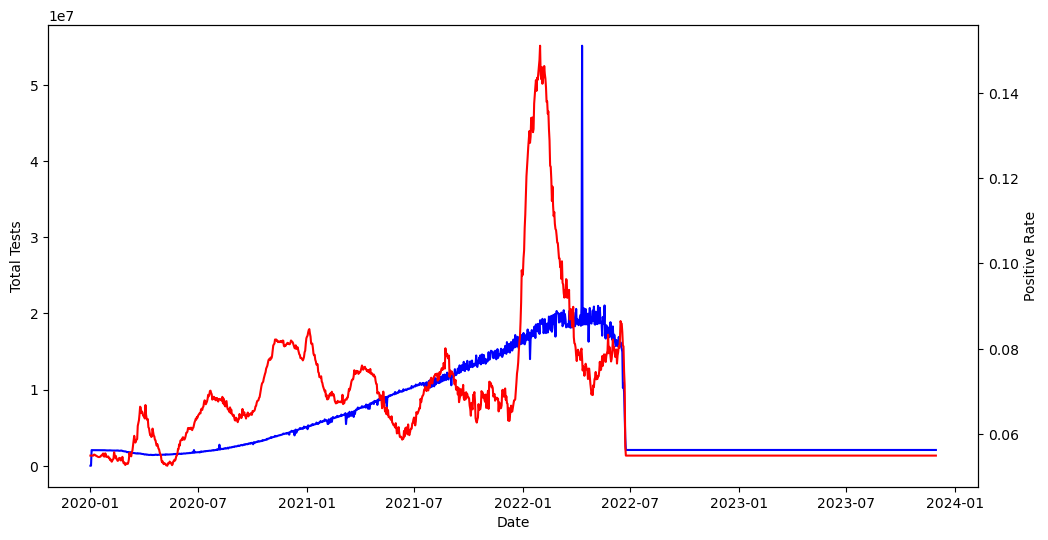

In [154]:
#figure and axis with dual y-axis

fig, ax1 = plt.subplots(figsize=(12,6))

#total tests
sns.lineplot(x='date', y='total_tests', data=df, color='blue', ax=ax1, errorbar=None)
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Tests')

#positive rate
ax2= ax1.twinx()
sns.lineplot(x='date', y='positive_rate', data=df, color='red', ax=ax2, errorbar=None)
ax2.set_xlabel('Date')
ax2.set_ylabel('Positive Rate')

### Activity 6: In-Depth Country Analysis
Conducting an in-depth examination of specific countries, understanding the correlation between cases and
deaths globally, and exploring continental variations in case distribution.
1. Visualize the total COVID-19 cases and deaths over time for a specific country.
2. Get user input for the country and metric (total_cases or total_deaths) and plot a line chart for the user
selected values.
3. Analyze the distribution of total cases across different continents using a box plot.
4. Visualize the Year wise monthly trend of new COVID-19 cases for user selected country.

### Activity 7: Additional Insights
Extracting additional insights, examining the influence of external factors, and evaluating regional disparities
for a holistic understanding of the COVID-19 landscape.
1. Visualize the fatality rate (total deaths / total cases) over time globally.
2. Explore positivity rate (total_cases/ total tests) verses total tests conducted to analyse testing effectiveness
use x axis as logarithmic scale for better visualization.
3. Analyze fatality rate and its relationship with smoking (Use male_smokers and female_smokers columns)
4. Create a heatmap to analyze the relationship between hospital beds per thousand and fatality rate.